<a href="https://colab.research.google.com/github/kmk3593/google_drive/blob/main/hg_chapter9/chapter_9_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 순환 신경망으로 IMDB 리뷰 분류
- 혹시, 자연어 처리, 감정분석 관심 있으면 강사님께 개인적으로 연락! 
- 주제 : 긍정리뷰 부정리뷰 분류 
- 501p 
  + 텍스트 자체가 신경망에 전달하지 않는다! (문자열 --> 수식에 적용 X)
  + 문자열을 수식으로 정하는 규칙이 매우 가변적임. (토근화, Tokenizing)
  + He follows the cat. He loves the cat. 
    10 11       12  13  10 14    12   13

  + 고양이를 따라간다. He follows the cat.
    10        11       12  13      14  15

- RNN, LSTM 알고리즘
  + 영어권 사람들이 만들었어요. 
  + 자연어처리와 관련된 많은 알고리즘
    + 영어권 사람들이 만듬

- 한글 != 영어
  + 성과 내려면 제품(=돈) (네이버)

In [1]:
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words = 500)

17473536/17464789 [==============================] - 0s 0us/step


- 데이터 크기 확인 (1차원 배열)
- 텍스트의 길이가 다 다르기 때문에 1차원 배열로 정리 가능

In [2]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


- 문장의 길이가 다 다르다! 

In [3]:
print(len(train_input[0]))
print(len(train_input[1]))
print(len(train_input[2]))

218
189
141


- Raw 데이터 전처리 -> 토큰화 작업이 끝난 상황 (문자열 --> 숫자로 바뀜)

In [4]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


- Target 데이터 출력
  + 0은 부정리뷰
  + 1은 긍정리뷰

In [5]:
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


### 데이터셋 분리

In [6]:
from sklearn.model_selection import train_test_split 
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size = 0.2, random_state=42
)

train_input.shape, val_input.shape, train_target.shape, val_target.shape

((20000,), (5000,), (20000,), (5000,))

### 데이터 시각화
- 각 리뷰의 평균단어의 갯수

In [7]:
import numpy as np
#temp_list = [len(x) for x in train_input]
# print(temp_list)
lengths = np.array([len(x) for x in train_input])
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


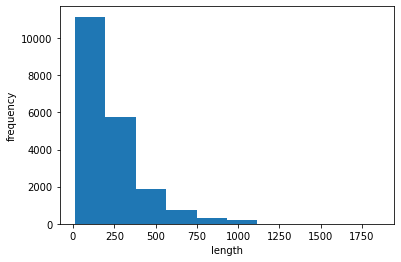

In [8]:
import matplotlib.pyplot as plt 
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

- 짧은 단어 100개만 사용
- 모든 길이를 100에 맞춘다. 
  + "패딩" 
- 데이터의 갯수는 20000, 전체 길이는 100으로 맞춤


In [9]:
from tensorflow.keras.preprocessing.sequence import pad_sequences 
train_seq = pad_sequences(train_input, maxlen = 100)

print(train_seq.shape)

(20000, 100)


In [10]:
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [11]:
print(train_input[0][-10:])
print(train_seq[0])

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]
[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [12]:
val_seq = pad_sequences(val_input, maxlen = 100)

### 순환 신경망 만들기

In [13]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape=(100, 500)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

- 원핫 인코딩 적용
  - 매칭이 성공하면 1을 출력

In [14]:
train_oh = keras.utils.to_categorical(train_seq)
print(train_oh.shape)

(20000, 100, 500)


In [15]:
print(train_oh[0][0][:12])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [16]:
print(np.sum(train_oh[0][0]))

1.0


- 1이 출력되었으므로 성공
- 이제 검증데이터에 적용한다.

In [17]:
val_oh = keras.utils.to_categorical(val_seq)

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


In [19]:
"""
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', 
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model.fit(train_oh, train_target, epochs=100, batch_size=64,
                    validation_data=(val_oh, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])
"""

"\nrmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)\nmodel.compile(optimizer=rmsprop, loss='binary_crossentropy', \n              metrics=['accuracy'])\n\ncheckpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5', \n                                                save_best_only=True)\nearly_stopping_cb = keras.callbacks.EarlyStopping(patience=3,\n                                                  restore_best_weights=True)\n\nhistory = model.fit(train_oh, train_target, epochs=100, batch_size=64,\n                    validation_data=(val_oh, val_target),\n                    callbacks=[checkpoint_cb, early_stopping_cb])\n"

- 514p 
  + 문제점 발생: 토큰 1개를 500차원으로 늘림.. --> 데이터 크기가 500배 커짐

In [20]:
from tensorflow import keras
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length = 100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [21]:
'''
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])
 '''

"\nrmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)\nmodel2.compile(optimizer=rmsprop, loss='binary_crossentropy', \n               metrics=['accuracy'])\n\ncheckpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5', \n                                                save_best_only=True)\nearly_stopping_cb = keras.callbacks.EarlyStopping(patience=3,\n                                                  restore_best_weights=True)\n\nhistory = model2.fit(train_seq, train_target, epochs=100, batch_size=64,\n                     validation_data=(val_seq, val_target),\n                     callbacks=[checkpoint_cb, early_stopping_cb])\n "

- Reference : 혼자 공부하는 머신러닝 + 딥러닝